# Introduction to data visualization with Python

## The Python Visualisation Landscape

![](https://github.com/rougier/python-visualization-landscape/blob/master/landscape-colors.png?raw=true)

### Can't see the forest for the trees?
- [PyViz.org](https://pyviz.org/) attempts to shine light on common patterns and use cases, comparing or discussing multiple plotting libraries.
- Have a look at [Bence Arató's talk at EuroPython 2020 (30 min.)](https://youtu.be/35e0Chuxqi0) if you prefer a video.
- Use the Grammar of Graphics as a mental model:
  - Wilkinson's original [Grammar of Graphics](https://github.com/jads-nl/public-lectures/blob/main/visualisation/bibliography/wilkinson2010grammar.pdf)
  - Wickham's extension into a [Layered Grammar of Graphics](https://github.com/jads-nl/public-lectures/blob/main/visualisation/bibliography//wickham2010layered-grammar.pdf) which is implemented in [ggplot2](https://r4ds.had.co.nz/data-visualisation.html) in R and [plotnine](https://plotnine.readthedocs.io/en/stable/) 
  - Vega-Lite's extension that includes a [Grammar of Interactions](https://github.com/jads-nl/public-lectures/blob/main/visualisation/bibliography/satyanarayan2017vega-lite.pdf)

### Learning objectives

- Know how to apply a grammar of _interactions_ to make interactive charts with the most commonly used Python graphing libraries (bokeh, plotly, altair)
- Know how to make single-page apps in Jupyter notebook with the most commonly used Python dashboarding and analytic app libraries (panel, plotly dash)

### Today we focus on _how_ to make interactive visualisations

- Apply Grammar of (Interactive) Graphics to dissect different implementations of Gapminder
- Look into under the hood to get better understanding how everything works, so you can start using the libraries properly
- Dissect different designs patterns of interactive graphs that are useful voor data analytics

## We will not talk about the _what_ of visualisation

- Go through the slides and online resources of [Sara Sprinkhuizen's lecture on _Data visualisation_](https://www.thedatavisionlab.com/blog/jads) to gain a better understanding _what_ makes a good data viz
- Use one of the many good online resources to help you choose the right chart for your task:
  - [the DataVizProject](https://datavizproject.com/)
  - [Financial Times Visual Vocabulary](https://github.com/ft-interactive/chart-doctor/tree/master/visual-vocabulary)
  - [chart.guide](https://chart.guide/)
- Stephen Few's classic book on [Information Dashboard Design](http://www.stephen-few.com/idd.php)

## Grammar of (Interactive) Graphics

### Leland's seven classes

| GoG class | Description | Comments and examples |
|:----------|:------------|:--------|
|__1. Varset__ | A set of one or more variables | More generic definition than just a table or `dataframe` |
|__2. Algebra__ | Produce combinations of variables | Join, concatenate, group by |
|__3. Scales__ | Scale variables | Transformation like taking log or normalizing |
|__4. Statistics__ | Compute statistical summeries | Generates a new varset |
|__5. Geometry__ | Control the type of plot | point, line, area, path, bar, polygon, edge etc. |
|__6. Coordinates__ | The coordinate system and faceting | Usually Cartesian, but also polar or geographic coordinates |
|__7. Aesthetics__ | Actual mapping of variables to a perceivable graphic | Visual variables include position, size, shape, orientation, brightness, color, granularity. For interactive graphics also blur, sound and motion. |

### Vega-Lite's Grammar of Interactions

| Selection component | Description | Comments and examples |
|:-----------|:------------|:--------|
| type | Way in which _backing points_ are selected as minimal set to identify all selected points | point, list, interval |
| predicate | Logic to determine selected points | Inside or outside dragged area, within a range etc. |
| domain or range | Invert screen position to data values | Click on a mark for selecting single point, drag to select points in area etc.|
| event | The actual input event | Mouseover, selection by dragging | 
| init | Initialize selection with specific points | Used for automatically determining scale extents |
| transforms | Manipulate selection | E.g. moving a rectangular selection |
| resolve | Re-evaluate visual encodings as selections change |Change color (highlighting), use selection as input for other encodings (cross-filtering), re-define scales etc. |

### Choosing your Python libraries for interactive visualizations and dashboards

Pythonistas are somewhat envious of that the fact that the R stack has set the standard for interactive data visualizations and dashboarding with [ggplot2](https://ggplot2.tidyverse.org/) and [Shiny](https://shiny.rstudio.com). But recently Python has caught up, going by the number of stars on GitHub.

![](stars-dashboarding-libraries.png)

For you interactive data visualization work, you need to make two choices:

- Choose your interactive plotting library for making figures. Altair, Bokeh and Plotly are the most popular ones, you can find a more detailed comparison [here](https://towardsdatascience.com/top-6-python-libraries-for-visualization-which-one-to-use-fe43381cd658)
- Choose your dashboarding library for making, you guessed it, dashboards. Streamlit, Voilá, Plotly Dash and Panel are the most popular ones, you can read more [here](https://medium.datadriveninvestor.com/streamlit-vs-dash-vs-voil%C3%A0-vs-panel-battle-of-the-python-dashboarding-giants-177c40b9ea57) and [here](https://www.datarevenue.com/en-blog/data-dashboarding-streamlit-vs-dash-vs-shiny-vs-voila)

Note that although many plotting libraries are supported in the dashboarding libraries, some integrations work better than others. Sticking to the same ecosystem yields the following combinations:

- [Plotly](https://plotly.com/) + [Plotly Dash](https://plotly.com/dash/): backed by a Canadian company under the same name, this is an excellent stack to work in. Over time you can upgrade to a paid (enterprise) version including low-code development environments and hosting for ease of sharing apps.
- [Bokeh](https://bokeh.org) + [Panel](https://panel.holoviz.org): pure open source libraries which are financially supported by the [NumFOCUS](https://numfocus.org) and [Anaconda](https://anaconda.com). Complete freedom to integrate these libraries into your own stack without ever having to worry about licensing.
- [Altair](https://altair-viz.github.io/) + [Streamlit](https://streamlit.io): the new kids on the block, but with an impressive pedigree. [University of Washinton Interactive Data Lab](https://idl.cs.washington.edu/) are the core developers of Altair, with Jeffrey Heer, Jake VanderPlas and Mike Bohstock amongst their ranks. Note that Tableau is a spin-off from this community, too. Streamlit is incorporated in the US, but it's creators are spread all over the world. It was acquired by Snowflake in 2022.

This curriculum focuses on Altair and Streamlit.

## Gapminder in many different ways

Let's look at [different implementations of the classic Gapminder bubble chart in a Streamlit dashboard](https://share.streamlit.io/dkapitan/streamlit-gapminder/main). The source code is as follows

2022-09-16 13:23:30.529 
  command:

    streamlit run /Users/dkapitan/.local/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
2022-09-16 13:23:30.530 Session state does not function when running a script without `streamlit run`


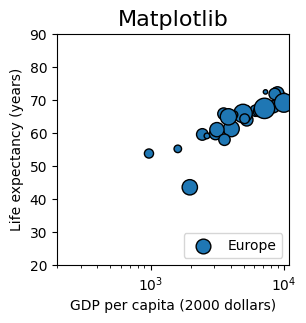

In [1]:
from dataclasses import dataclass

import altair as alt
from bokeh.models import (Button, CategoricalColorMapper, ColumnDataSource, HoverTool, Label, LogTicker, Slider)
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import streamlit as st


@dataclass
class Gapminder:
    """Class for storing Gapminder data and plots"""

    url: str = "https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv"
    year: int = 1952
    show_data: bool = False
    show_legend: bool = True
    chart_height: int = 500

    def __post_init__(self):
        self.dataset = pd.read_csv(self.url)
        self.df = self.get_data()
        self.title = f"Life expectancy vs. GPD ({self.year}"
        self.xlabel = "GDP per capita (2000 dollars)"
        self.ylabel = "Life expectancy (years)"
        self.xlim = (self.df['gdpPercap'].min()-100,self.df['gdpPercap'].max()+1000)
        self.ylim = (20, 90)

    def get_data(self):
        """Return gapminder data for a given year.

        Countries with gdpPercap lower than 10,000 are discarded.
        """
        df = self.dataset[
            (self.dataset.year == self.year) & (self.dataset.gdpPercap < 10000)
        ].copy()
        df["size"] = np.sqrt(df["pop"] * 2.666051223553066e-05)
        return df

    def altair(self):
        legend = {} if self.show_legend else {"legend": None}
        plot = (
            alt.Chart(self.df)
            .mark_circle()
            .  (
                alt.X(
                    "gdpPercap:Q",
                    scale=alt.Scale(type="log"),
                    axis=alt.Axis(title=self.xlabel),
                ),
                alt.Y(
                    "lifeExp:Q",
                    scale=alt.Scale(zero=False, domain=self.ylim),
                    axis=alt.Axis(title=self.ylabel),
                ),
                size=alt.Size("pop:Q", scale=alt.Scale(type="log"), legend=None),
                color=alt.Color(
                    "continent", scale=alt.Scale(scheme="category10"), **legend
                ),
                tooltip=["continent", "country", "gdpPercap", "lifeExp"],
            )
            .properties(title="Altair", height=self.chart_height)
            .configure_title(anchor="start")
        )

        return plot.interactive()

    def plotly(self):
        traces = []
        for continent, self.df in self.df.groupby("continent"):
            marker = dict(
                symbol="circle",
                sizemode="area",
                sizeref=0.1,
                size=self.df["size"],
                line=dict(width=2),
            )
            traces.append(
                go.Scatter(
                    x=self.df.gdpPercap,
                    y=self.df.lifeExp,
                    mode="markers",
                    marker=marker,
                    name=continent,
                    text=self.df.country,
                )
            )

        axis_opts = dict(
            gridcolor="rgb(255, 255, 255)", zerolinewidth=1, ticklen=5, gridwidth=2
        )
        layout = go.Layout(
            title="Plotly",
            showlegend=self.show_legend,
            height=self.chart_height,
            xaxis=dict(title=self.xlabel, type="log", **axis_opts),
            yaxis=dict(title=self.ylabel, **axis_opts),
        )

        return go.Figure(data=traces, layout=layout)

    
    def bokeh(self):
        # note bokeh version issue https://discuss.streamlit.io/t/bokeh-2-0-potentially-broken-in-streamlit/2025/8
        source = ColumnDataSource(self.df)
        color_mapper = CategoricalColorMapper(palette=Spectral6, factors=self.df.continent.unique())
        plot = figure(title="Bokeh", x_axis_type="log", height=self.chart_height)
        plot.xaxis.axis_label = self.xlabel
        plot.xaxis.ticker=LogTicker()
        plot.yaxis.axis_label = self.ylabel
        plot.scatter(
            x="gdpPercap",
            y="lifeExp",
            size="size",
            source=source,
            fill_color={"field": "continent", "transform": color_mapper},
            fill_alpha=0.8,
            line_color="#7c7e71",
            line_width=0.5,
            line_alpha=0.5,
            legend_group="continent"
            )
        plot.add_tools(HoverTool(tooltips=[
            ("continent:", "@continent"),
            ("country:", "@country"),
            ("GDP per capita:", "@gdpPercap"),
            ("Life expectancy:", "@lifeExp")], show_arrow=False, point_policy="follow_mouse"))
        return plot

    
    def pyplot(self):
            data = self.df
            title = "Matplotlib"
            fig, ax = plt.subplots(figsize=(3, 3))
            ax.set_xscale("log")
            ax.set_title(title, fontsize=16)
            ax.set_xlabel(self.xlabel, fontsize=10)
            ax.set_ylabel(self.ylabel, fontsize=10)
            ax.set_ylim(self.ylim)
            ax.set_xlim(self.xlim)

            for continent, df in data.groupby('continent'):
                ax.scatter(df.gdpPercap, y=df.lifeExp, s=df['size']*5,
                        edgecolor='black', label=continent)
                
            if self.show_legend:
                ax.legend(loc=4)
            
            return fig


# initiate
gapminder = Gapminder()
st.set_page_config(layout="wide")

# side bar
st.sidebar.subheader("Widgets")
st.sidebar.markdown("Use the slider to show data from subsequent years.")
gapminder.year = st.sidebar.slider(label="", min_value=1952, max_value=2007, step=5)
gapminder.show_legend = st.sidebar.checkbox("Toggle legend", gapminder.show_legend)
gapminder.df = gapminder.get_data()


# main body
st.title("Gapminder in different ways")
st.markdown(
    """Demo of different interactive plotting libraries reproducing the classic
    [Gapminder bubble chart](https://discuss.streamlit.io/t/bokeh-2-0-potentially-broken-in-streamlit/2025/8).
    """
)

with st.expander("Show data"):
    st.dataframe(gapminder.df)

col1, col2 = st.columns([1, 1])

with col1:
    st.altair_chart(gapminder.altair(), True)
    st.plotly_chart(gapminder.plotly(), True)

with col2:
    st.bokeh_chart(gapminder.bokeh(), use_container_width=True)
    st.pyplot(gapminder.pyplot(), False)

## Altair

### Structure of a Altair plot

| | |
|:---:|:---:|
|__alt__| convention to `import altair as alt`|
|__.Chart(data)__| instantiate `Chart` object with data|
|__.transform_{aggregate\|bin\|calculate\|...}__| apply transformations before visualization |
|__.mark_{area\|bar\|circle\|\|...}__| choose the geometry c.q. type of plot|
|__.encode(x=.., y=.., color=..}__| mapping of variables to a perceivable graphic|
|__.add_selection(...)__| define type and predicates for interactive selections|
|__.transform_filter(...)__| apply selection filter|
|__.properties(width=..., height=...)__| set properties of figure|
|__.interactive()__| enable panning and zooming|

### Workshop exercises

We are going to use Altair for exploratory data analysis (EDA), with a dataset of choice. Try to make the following, starting with a simple graph and building up to more complex interactions

1. Create a histogram of a feature of interest using `alt.Chart().mark_bar()`
2. Create a [small multiple](https://en.wikipedia.org/wiki/Small_multiple) of histograms for various features using `.facet` or `.repeat`. Refer to the section on [multi-view composition](altair_view_composition.ipynb)
3. Add an interactive average to your barchart, as shown in the example below
4. Create a dynamic query, where the histogram is changed interactively based on some input. See the section on [Altair interaction](altair_interaction.ipynb)
5. Create a dynamic query where the filter is based on an other graph
6. Create a Streamlit dashboard that presents your main findings and conclusions from your EDA

### Example to get started

In [4]:
import altair as alt
from vega_datasets import data


df = data.seattle_weather()
df

date  precipitation  temp_max  temp_min  wind  weather
0    2012-01-01            0.0      12.8       5.0   4.7  drizzle
1    2012-01-02           10.9      10.6       2.8   4.5     rain
2    2012-01-03            0.8      11.7       7.2   2.3     rain
3    2012-01-04           20.3      12.2       5.6   4.7     rain
4    2012-01-05            1.3       8.9       2.8   6.1     rain
...         ...            ...       ...       ...   ...      ...
1456 2015-12-27            8.6       4.4       1.7   2.9      fog
1457 2015-12-28            1.5       5.0       1.7   1.3      fog
1458 2015-12-29            0.0       7.2       0.6   2.6      fog
1459 2015-12-30            0.0       5.6      -1.0   3.4      sun
1460 2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]

#### step 1: basic bar chart

In [5]:
bar = alt.Chart(df).mark_bar().encode(x="month(date):T", y="mean(precipitation):Q")
bar

alt.Chart(...)

#### Step 2: add a rule with at the average

In [10]:
rule = alt.Chart(df).mark_rule(color="firebrick").encode(y="mean(precipitation):Q")


alt.LayerChart(...)

### Step 3: Create small multiple with `.facet`

Create a small multiple of the previous graph for each type of weather. The facet plot should have 2 columns.

In [13]:
(bar + rule).properties(width=400).facet(facet="weather:O", columns=2)

alt.FacetChart(...)

In [12]:
# more verbose solution, to show how you can parametrize composition in Altair
bar_ = (alt
       .Chart()
       .mark_bar()
       .encode(x="month(date):T", y="mean(precipitation):Q"))
rule_ = (alt
        .Chart()
        .mark_rule(color="firebrick")
        .encode(y="mean(precipitation):Q")
       )
alt.layer(bar_, rule_, data=df).facet(facet="weather:O", columns=2)

alt.FacetChart(...)

#### Step 4: Add interaction

See also [mean based selection](https://altair-viz.github.io/gallery/select_detail.html?highlight=mean%20based%20selection)

In [15]:
selection = alt.selection_interval(encodings=['x'])

base = alt.Chart(df)

bar_i = base.mark_bar().encode(
    x="month(date):T",
    y="mean(precipitation):Q",
    opacity=alt.condition(selection, alt.value(1.0), alt.value(0.7))).add_selection(selection)

rule_i = base.mark_rule(color="firebrick").transform_filter(selection).encode(y="mean(precipitation):Q")
text = rule_i.mark_text(angle=0, color='firebrick', dy=-10).encode(text=alt.Text('mean(precipitation):Q',format=',.2r'))

(bar_i + rule_i + text).properties(width=600)

alt.LayerChart(...)

### Challenge

Extend your code to build a small multiple with interaction for each multiple. Feel free to submit your solution, so it can be included in this notebook.

## Closing remarks

### Plotly is a good alternative to Altair
![](plotly-figure-overview.png)

#### Animations with Plotly

In [2]:
import plotly.express as px

gapminder = px.data.gapminder()
gapminder_animate = px.scatter(gapminder, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90], width=800, height=400)

In [3]:
gapminder_animate.show()

Read more on how you can use `plotly.express` directly from `pandas`.

- https://medium.com/plotly/plotly-py-4-0-is-here-offline-only-express-first-displayable-anywhere-fc444e5659ee
- https://plotly.com/python/plotly-express/
- https://plotly.com/python/pandas-backend/

### Know your limits

- Single-Page Apps (SPAs) are do-able
- Beware when you are moving into advanced development territory
  - [Multi-page apps](https://dash.plotly.com/urls)
  - [Sharing data between callbacks](https://dash.plotly.com/sharing-data-between-callbacks): when your datasets get too large, you need to store it somewhere and keep track of state of your dataset.
  - Working with callbacks does have limitations. If you notice that you need to nest callbacks (callback A -> callback B -> callback C -> final result), you are on your way to the Callback Hell a.k.a. the [Pyramid of Doom](https://javascript.info/callbacks#pyramid-of-doom). Stop and reconsider before continuing.

  

### My personal recommendations

- Choose any interactive plotting library and get to know it: altair, bokeh or plotly
- Choose any of the higher level APIs to be productive in you data analysis work: plotly Express or Altair
- Choose any of the dashboarding libraries to make an interactive notebook app: Streamlit or Dash
- Don't try to build your own BI tool. Buy one. It saves time and money. (PS: have a look at [redash.io](https://redash.io))